<a href="https://colab.research.google.com/github/abyanjan/Fraud-Detection/blob/master/Fraud_detection_supervised_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Fraud Detection with Supervised Classification

### Downloading Data From kaggle

The data is accessed through the Kaggle at https://www.kaggle.com/mlg-ulb/creditcardfraud

In [ ]:
!pip install -q kaggle

In [ ]:
# upload the kaggle.json file that has the api key
from google.colab import files
files.upload()

In [ ]:
!mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# download data
!kaggle datasets download -d mlg-ulb/creditcardfraud

 86% 57.0M/66.0M [00:02<00:00, 16.1MB/s]
100% 66.0M/66.0M [00:02<00:00, 26.4MB/s]


In [ ]:
# unzipping the file
!unzip creditcardfraud.zip

Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


### Loading and Exploring the Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# data size
df.shape

(284807, 31)

In [ ]:
# class distribution
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
# percentage of the class labels
df.Class.value_counts(normalize=True)*100

0    99.827251
1     0.172749
Name: Class, dtype: float64

We have around only 0.17% of the data to be fradulent cases, which represents very highly imbalnce data.

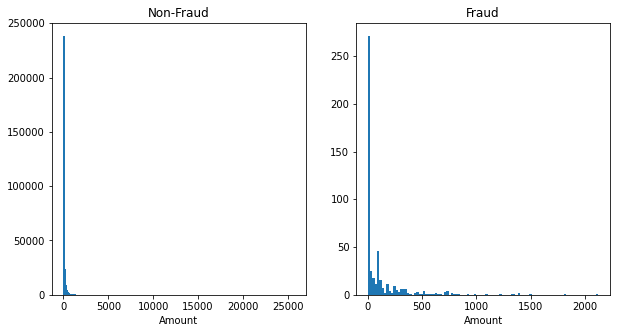

In [ ]:
# Distribution of Amount in the transations
fig, ax = plt.subplots(1,2, figsize = (10,5))

#non-fraudlent cases
ax[0].hist(df.loc[df['Class'] == 0, 'Amount'], bins=200, label = 'Non-fraud')
ax[0].set_title("Non-Fraud")
ax[0].set_xlabel("Amount")

# fraud cases
ax[1].hist(df.loc[df['Class'] == 1, 'Amount'], bins=100, label = 'Fraud')
ax[1].set_title("Fraud")
ax[1].set_xlabel("Amount")

plt.show()

We can see from the plots, for the non-fraud cases, while majority of the transactions are of very low Amount, some have high Amount. For the fraud cases also, majority of the transactions have low Amount and the maximum is only around 2000. It is hard to distinguisgh beteween the two cases from the plot above. So we can print some descriptive statistics.

In [ ]:
# desscriptive statistics for the cases
df.groupby('Class')['Amount'].describe()

,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
0,284315.0,88.291022,250.105092,0.0,5.65,22.00,77.05,25691.16
1,492.0,122.211321,256.683288,0.0,1.00,9.25,105.89,2125.87


From the summary statistics, fraud cases are seen to have on average higher amount in transactions.

### Modeling with Supervised Classification

In [ ]:
# separate the features and class label
X = df.iloc[:,1:30]
y = df.Class
print(f'X shape: {X.shape}\ny shape: {y.shape}')

X shape: (284807, 29)
y shape: (284807,)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
161145,-0.132066,0.107044,-0.650588,-0.996032,1.814333,1.740740,0.496852,0.633016,0.017181,-0.362707,0.527911,0.505396,-0.742107,0.492430,-0.163585,-0.950404,0.262987,-1.760767,-0.939037,-0.062612,-0.062489,0.005292,0.251519,-2.466810,-0.889690,0.337462,0.306395,0.074817,47.89
204520,2.125994,0.014207,-1.514760,0.115021,0.598510,-0.333235,0.199289,-0.264353,0.384111,0.028747,-1.208334,0.838156,1.511476,-0.042076,-0.002894,0.080270,-0.658905,-0.747678,0.431762,-0.086076,-0.329368,-0.788150,0.267730,0.066122,-0.135785,0.203841,-0.068267,-0.057678,1.98
182659,-0.086694,0.166240,1.573127,0.687266,0.222359,1.102606,1.575093,-1.098608,0.763887,1.404677,1.346697,0.140822,0.159637,-1.147153,0.664997,-0.133032,-1.267675,0.818995,0.405276,0.052960,0.015324,1.063663,-0.410841,0.722723,-0.171733,-0.613543,-1.201571,-1.139931,170.10
25117,1.352339,-0.534984,0.555143,-0.629355,-1.144170,-0.852967,-0.642128,-0.032659,-0.654482,0.619206,0.103615,-1.067971,-1.227629,0.197196,1.151364,0.846905,0.710309,-1.963506,0.130406,-0.066712,-0.014814,-0.180379,0.178112,0.347720,0.151810,-0.404361,0.013746,0.016152,5.96
227642,-1.526760,0.647782,0.615391,-0.561114,0.836950,-0.514251,0.984325,-0.097430,-0.062634,-1.033567,-0.706095,-0.612354,-0.336939,-1.384147,0.314279,0.552201,0.512582,0.370183,-0.163736,-0.073333,-0.221533,-0.393158,-0.214990,0.588447,0.679496,0.518434,0.065022,0.147294,89.95


**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Define the model as the random forest
model = RandomForestClassifier(random_state=5, n_estimators=50)

# Fit the model to our training set
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=5, verbose=0,
                       warm_start=False)

In [ ]:
# Obtain predictions from the test data 
predicted = model.predict(X_test)

In [ ]:
#Accuracy score
print(f'Accuracy Score:\n{accuracy_score(y_test, predicted):0.5f}')

Accuracy Score:
0.99947


While we recieve a very high Accuracy score, it is not a good evaluation metric for an unbalanced dataset. As we saw we had only 0.17 % of the fraud cases and 99.83% of non-fraud cases. So, if we were to predict all cases to be non-fruad, we could already achieve a high accuracy of 99.83%, but it would completely misclassify all of the fraud cases. 

In [ ]:
# confusion matrix
confusion_matrix(y_test, predicted)

array([[85291,     5],
       [   40,   107]])

From the confusion matrix, we see that even we had a very high accuracy of about 99.9%, our model still misclassified 40 of the fraud cases as non fraud, but we want the model to make less mistake in correctly classifying fraud cases becuases they cost more to us.   

Therefore, for imbalanced datasets we need to explore other measures of evaluation, such as AUC socre, Precision, Recall and F1 score

In [ ]:
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score, recall_score

In [ ]:
# make predictions in form of probablities
pred_prob = model.predict_proba(X_test)

In [ ]:
# auc score
print(f'Auc_score: {round(roc_auc_score(y_test, pred_prob[:,1]), 3)}') 

# Precison 
print(f'PR_AUC_score: {round(average_precision_score(y_test, pred_prob[:,1]),3)}')

# F1 score
print(f'F1_score: {round(f1_score(y_test, predicted),3)}')

# Recall
print(f'Recall: {round(recall_score(y_test, predicted), 3)}')


Auc_score: 0.945
PR_AUC_score: 0.827
F1_score: 0.826
Recall: 0.728


**ROC-AUC curve and PR-Curve**

In [ ]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve

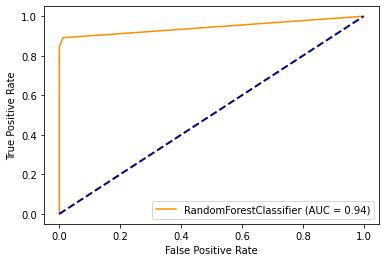

In [ ]:
# roc curve
plot_roc_curve(model, X_test, y_test,color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--');

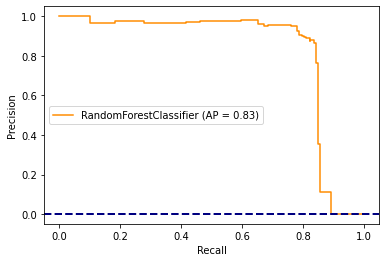

In [ ]:
# pr curve
plot_precision_recall_curve(model, X_test, y_test, color = 'darkorange')
plt.axhline(y = 0.0017, color = "navy", lw = 2, linestyle="--")
plt.legend(loc="center left")

**Using Class weights**  
Since are data is very imbalanced, we can assign class weights in our model to give more importance to the class of interest, which is the fraud class in this case.

In [ ]:
model = RandomForestClassifier(bootstrap=True,
                               class_weight={0:1, 1:12},
                               criterion='entropy',
                               # Change depth of model
                               max_depth=10,
                               # Change the number of samples in leaf nodes
                               min_samples_leaf=10, 
                               # Change the number of trees to use
                               n_estimators=50,
                               n_jobs=-1,
                               random_state=5)

model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 1, 1: 12}, criterion='entropy',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=10,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=50, n_jobs=-1, oob_score=False,
                       random_state=5, verbose=0, warm_start=False)

In [ ]:
#make predictions
predicted = model.predict(X_test)
pred_prob = model.predict_proba(X_test)

In [ ]:
# confusion matrix, classification report
print(classification_report(y_test, predicted))
print()
confusion_matrix(y_test, predicted)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.87      0.81      0.84       147

    accuracy                           1.00     85443
   macro avg       0.93      0.90      0.92     85443
weighted avg       1.00      1.00      1.00     85443




array([[85278,    18],
       [   28,   119]])

In [ ]:
# Auc score
print(f'AUC Score: {round(roc_auc_score(y_test, pred_prob[:,1]),3)}')

AUC Score: 0.985


With class weights, we have improved our results. The model now only misclassified 28 cases of fraud as non-frauds compared to 40 earlier. Also, our AUC score has increased from 0.945 to 0.985

We can further try to improve the model results through hyperparameter tuninig of the model.

**Grid Search**

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
# Define the parameter sets to test
param_grid = {'n_estimators': [20, 50,100],
              'max_features': ['auto', 'log2'], 
              'max_depth': [4, 8, 10, 12],
              'criterion': ['gini', 'entropy']}

# Define the model to use
model = RandomForestClassifier(class_weight={0:1, 1:12},min_samples_leaf=10,random_state=5)

In [ ]:
# Combine the parameter sets with the defined model
CV_model = RandomizedSearchCV(estimator=model, param_distributions=param_grid, cv=3, scoring='roc_auc', n_jobs=-1)

In [ ]:
# Fit the model to our training data and obtain best parameters
CV_model.fit(X_train, y_train)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight={0: 1, 1: 12},
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=10,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
     

In [ ]:
# best parameters
CV_model.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'log2',
 'n_estimators': 100}

In [ ]:
model = CV_model.best_estimator_

In [ ]:
#make predictions
predicted = model.predict(X_test)
pred_prob = model.predict_proba(X_test)

In [ ]:
# confusion matrix, classification report
print(classification_report(y_test, predicted))
print()
confusion_matrix(y_test, predicted)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.85      0.80      0.82       147

    accuracy                           1.00     85443
   macro avg       0.93      0.90      0.91     85443
weighted avg       1.00      1.00      1.00     85443




array([[85276,    20],
       [   30,   117]])

In [ ]:
# Auc score
print(f'AUC Score: {round(roc_auc_score(y_test, pred_prob[:,1]),3)}')

AUC Score: 0.984


With the grid search we did not receive any improvement, we could try searching with more parameters specifications.